In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

In [2]:
os.getcwd()

'C:\\Users\\sunilchawla\\Desktop\\ass3\\code'

In [3]:
path = "../creditcard/"

In [4]:
data = pd.read_csv(path + "creditcard.csv")

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
import warnings
warnings.filterwarnings('ignore')

#### Data preprocessing

In [8]:
from sklearn.preprocessing import StandardScaler

data['scaled_Amount'] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))
data = data.drop(['Time', 'Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [9]:
X = data.drop(['Class'],axis = 1)
y = data['Class']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (199364, 29)
Number transactions y_train dataset:  (199364,)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443,)


In [12]:
y_test.value_counts()

0    85296
1      147
Name: Class, dtype: int64

#### deep learning MLP

In [13]:
from keras.utils.np_utils import to_categorical
#convert y_train and y_test to categorical values with 2 classes
Y_train = to_categorical(y_train, num_classes = 2)
Y_test = to_categorical(y_test, num_classes = 2)

Using TensorFlow backend.


In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [15]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(29,)))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [16]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               3840      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 4,098
Trainable params: 4,098
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
history = model.fit(X_train, Y_train,
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                    validation_split=0.3,
                    shuffle=True)

Train on 139554 samples, validate on 59810 samples
Epoch 1/10
139554/139554 [==============================] - 1s 9us/step - loss: 0.0409 - acc: 0.9882 - val_loss: 0.0051 - val_acc: 0.9989
Epoch 2/10
139554/139554 [==============================] - 1s 8us/step - loss: 0.0047 - acc: 0.9993 - val_loss: 0.0032 - val_acc: 0.9994
Epoch 3/10
139554/139554 [==============================] - 1s 8us/step - loss: 0.0036 - acc: 0.9993 - val_loss: 0.0030 - val_acc: 0.9994
Epoch 4/10
139554/139554 [==============================] - 1s 8us/step - loss: 0.0031 - acc: 0.9994 - val_loss: 0.0027 - val_acc: 0.9994
Epoch 5/10
139554/139554 [==============================] - 1s 8us/step - loss: 0.0031 - acc: 0.9994 - val_loss: 0.0029 - val_acc: 0.9994
Epoch 6/10
139554/139554 [==============================] - 1s 8us/step - loss: 0.0030 - acc: 0.9994 - val_loss: 0.0025 - val_acc: 0.9994
Epoch 7/10
139554/139554 [==============================] - 1s 7us/step - loss: 0.0028 - acc: 0.9994 - val_loss: 0.0028 -

In [18]:
model.evaluate(X_test, Y_test, verbose=1)

85443/85443 [==============================] - 1s 9us/step


[0.002942695676220536, 0.999403110845827]

#### plot confusion matrix

In [19]:
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')

In [20]:
y_pred = model.predict(X_test)

In [21]:
y_pred

array([[9.9998116e-01, 1.8795788e-05],
       [9.9992514e-01, 7.4870644e-05],
       [9.9991441e-01, 8.5571904e-05],
       ...,
       [9.9920398e-01, 7.9599197e-04],
       [9.9994791e-01, 5.2043997e-05],
       [9.9998033e-01, 1.9665855e-05]], dtype=float32)

In [22]:
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(y_pred,axis = 1) 

In [23]:
Y_pred_classes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
# Convert Y_test to one hot vectors
Y_true = np.argmax(Y_test,axis = 1) 

In [25]:
Y_true

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
cnf_matrix = confusion_matrix(Y_pred_classes, Y_true) 

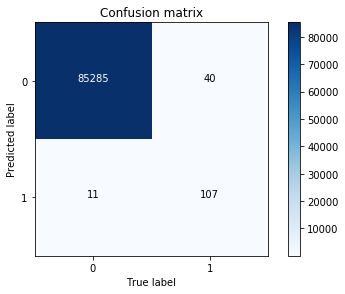

In [27]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

In [28]:
print("Recall(TPR)in the train dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1])))

Recall(TPR)in the train dataset: 72.78911564625851%


In [29]:
# y_pred1 = y_pred > 0.5
# y_pred1 = y_pred1.astype(int)
# y_pred1.reshape()
# cnf_matrix = confusion_matrix(y_pred1, y_test)
# cnf_matrix

# Autoencoder

In [30]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state = 0)

In [31]:
X_train.shape

(227845, 30)

In [32]:
X_test.shape

(56962, 30)

In [33]:
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)
y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

In [34]:
X_train = X_train.values

In [35]:
X_test = X_test.values

In [36]:
input_dim = X_train.shape[1]
encoding_dim = 14

In [37]:
from keras.layers import Input, Dense
from keras.models import Model, load_model
from keras import regularizers

In [38]:
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation = "tanh", activity_regularizer = regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation = "relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation = 'tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [39]:
print(autoencoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 29)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 14)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 105       
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_6 (Dense)              (None, 29)                232       
Total params: 813
Trainable params: 813
Non-trainable params: 0
_________________________________________________________________
None


In [40]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [41]:
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=256,shuffle=True,verbose = 1)

Epoch 1/10
227454/227454 [==============================] - 1s 6us/step - loss: 0.9977 - acc: 0.2351
Epoch 2/10
227454/227454 [==============================] - 1s 5us/step - loss: 0.8397 - acc: 0.5127
Epoch 3/10
227454/227454 [==============================] - 1s 5us/step - loss: 0.8009 - acc: 0.5683
Epoch 4/10
227454/227454 [==============================] - 1s 5us/step - loss: 0.7725 - acc: 0.6041
Epoch 5/10
227454/227454 [==============================] - 1s 5us/step - loss: 0.7657 - acc: 0.6094
Epoch 6/10
227454/227454 [==============================] - 1s 5us/step - loss: 0.7598 - acc: 0.6150
Epoch 7/10
227454/227454 [==============================] - 1s 5us/step - loss: 0.7517 - acc: 0.6241
Epoch 8/10
227454/227454 [==============================] - 1s 5us/step - loss: 0.7443 - acc: 0.6313
Epoch 9/10
227454/227454 [==============================] - 1s 6us/step - loss: 0.7397 - acc: 0.6365
Epoch 10/10
227454/227454 [==============================] - 1s 5us/step - loss: 0.7367 - a

In [42]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_test})

In [43]:
error_df.head()

,reconstruction_error,true_class
183484,0.367178,0
255448,0.266229,0
244749,1.104981,0
63919,0.778039,0
11475,0.850267,0


In [44]:
threshold = 1

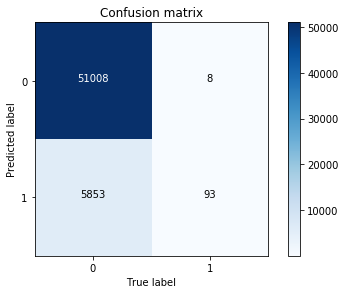

In [45]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
cnf_matrix = confusion_matrix(y_pred, error_df.true_class)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = class_names, title = 'Confusion matrix')
plt.show()

In [46]:
y_test.value_counts()

0    56861
1      101
Name: Class, dtype: int64

In [47]:
print("Recall(TPR)in the train dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1])))

Recall(TPR)in the train dataset: 92.07920792079207%
